In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import random
RS = 27
random.seed(RS)
np.random.seed(RS)

In [3]:
# Read training data. 
# Inspections of restaurants
df = pd.read_csv('../code/data/facility_scores_known.csv')
df.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,69618,Fancy Wheatfield Bakery,1362 Stockton St,San Francisco,CA,94133,NaN,NaN,NaN,NaN,...,Complaint,69618_20190304_103130,Inadequate sewage or wastewater disposal,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,...,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
2,69487,Hakkasan San Francisco,1 Kearny St,San Francisco,CA,94108,NaN,NaN,NaN,NaN,...,Routine - Unscheduled,69487_20180418_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
3,91044,Chopsticks Restaurant,4615 Mission St,San Francisco,CA,94112,NaN,NaN,NaN,NaN,...,Non-inspection site visit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,85987,Tselogs,552 Jones St,San Francisco,CA,94102,NaN,NaN,NaN,NaN,...,Routine - Unscheduled,85987_20180412_103132,Improper thawing methods,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Drop rows that have no inspection score. 
df_score_cleaned = df.dropna(subset=['inspection_score'])
# Narrow down the columns. 
score_data = df_score_cleaned[['violation_description', 'risk_category', 'inspection_score']]
score_data.head()

,violation_description,risk_category,inspection_score
1,Inadequately cleaned or sanitized food contact...,Moderate Risk,96.0
2,Inadequate and inaccessible handwashing facili...,Moderate Risk,88.0
4,Improper thawing methods,Moderate Risk,94.0
7,Improper food storage,Low Risk,86.0
8,Low risk vermin infestation,Low Risk,96.0


In [5]:
# Define the ordinal scale of 'risk_category' column. 
score_data['risk_category'] = score_data['risk_category'].fillna('No risk')
risk_mapping = {'High Risk': 0, 'Moderate Risk': 1, 'Low Risk': 2, 'No risk': 3}
score_data['risk_category'] = score_data['risk_category'].map(risk_mapping)
score_data.head()

/Users/kei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/kei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,violation_description,risk_category,inspection_score
1,Inadequately cleaned or sanitized food contact...,1,96.0
2,Inadequate and inaccessible handwashing facili...,1,88.0
4,Improper thawing methods,1,94.0
7,Improper food storage,2,86.0
8,Low risk vermin infestation,2,96.0


In [6]:
score_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31650 entries, 1 to 43198
Data columns (total 3 columns):
violation_description    30010 non-null object
risk_category            31650 non-null int64
inspection_score         31650 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 989.1+ KB


In [7]:
# One hot encoding for 'violation_description' column
df_dummy = pd.get_dummies(score_data['violation_description']) 
score_data = pd.concat([score_data.drop(['violation_description'], axis=1), df_dummy], axis=1)
score_data.head()

,risk_category,inspection_score,Consumer advisory not provided for raw or undercooked foods,Contaminated or adulterated food,Discharge from employee nose mouth or eye,Employee eating or smoking,Food in poor condition,Food safety certificate or food handler card not available,Foods not protected from contamination,High risk food holding temperature,...,Unauthorized or unsafe use of time as a public health control measure,Unclean hands or improper use of gloves,Unclean nonfood contact surfaces,Unclean or degraded floors walls or ceilings,Unclean or unsanitary food contact surfaces,Unclean unmaintained or improperly constructed toilet facilities,Unpermitted food facility,Unsanitary employee garments hair or nails,Wiping cloths not clean or properly stored or inadequate sanitizer,Worker safety hazards
1,1,96.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,88.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,94.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2,86.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2,96.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
score_data.shape

(31650, 67)

In [9]:
# Set the target column. 
target = 'inspection_score'

In [10]:
# Train test split
from sklearn.model_selection import train_test_split

y = score_data[target]
X = score_data.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RS)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25320, 66), (6330, 66), (25320,), (6330,))

In [12]:
#################
# k-Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor

n_neighbors 2
n_neighbors 3
n_neighbors 4
n_neighbors 5
n_neighbors 6
n_neighbors 7
n_neighbors 8
n_neighbors 9


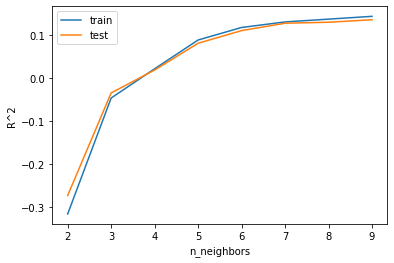

In [13]:
training_score = []
test_score = []

for n_neighbors in range(2, 15): 
    print('n_neighbors', n_neighbors)
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    training_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))
    
plt.plot(range(2, 15), training_score, label='train')
plt.plot(range(2, 15), test_score, label='test')
plt.ylabel('R^2')
plt.xlabel('n_neighbors')
plt.legend()

In [14]:
# Train with k=9. 
knn = KNeighborsRegressor(n_neighbors=9)
knn.fit(X_train, y_train)
print('R^2: {}'.format(knn.score(X_test, y_test)))

R^2: 0.136558189433032
